In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset=dataset.drop(["CustomerID","Genre","Age"], axis=1)
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
# from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data["Genre"]=le.fit_transform(data["Genre"])
#data

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [13]:
dataset.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
X=dataset.iloc[:,:2].values     # we are considering only 2 columns coz we want to plot scatterplot and see relation
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Elbow curve

##### find the optimal no of clusters

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30273.394312070042, 25337.02776778904, 21794.8856090982, 19774.784179883114]


<function matplotlib.pyplot.show(close=None, block=None)>

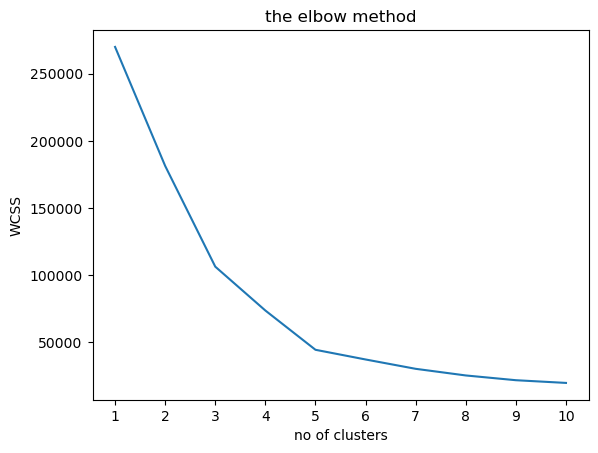

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("the elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show

### K-means Model

In [18]:
#modelling
kmeans=KMeans(n_clusters=5,init='k-means++')

#predict
y_kmeans=kmeans.fit_predict(X)

y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [20]:
dataset["cluster"]=pd.DataFrame(y_kmeans)
dataset

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


## Visualizing the clusters

#### Before clustering

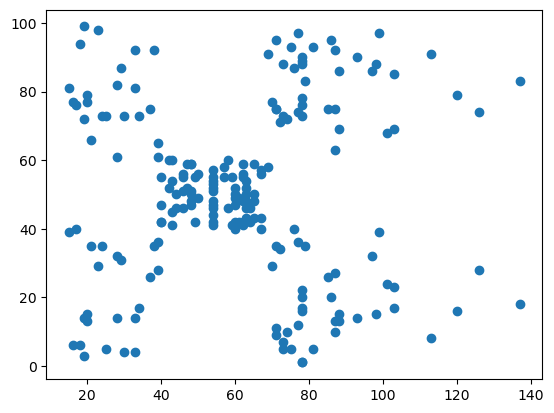

In [21]:
a=dataset.iloc[:,0]
b=dataset.iloc[:,1]

plt.scatter(a,b)
plt.show()

#### After clustering

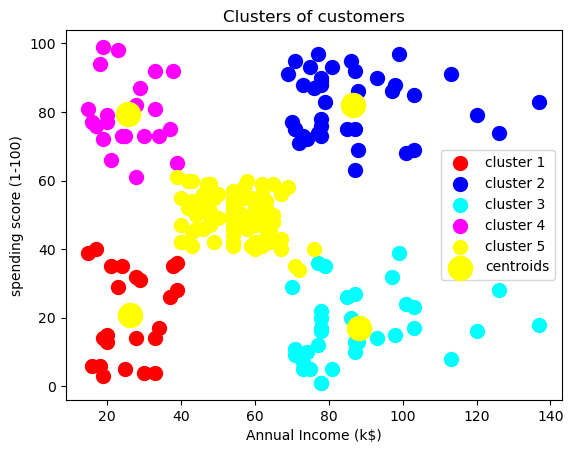

In [22]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],
           s = 100, c = 'red' ,label = 'cluster 1')

plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],
           s = 100, c = 'blue' ,label = 'cluster 2')

plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],
           s = 100, c = 'cyan' ,label = 'cluster 3')

plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],
           s = 100, c = 'magenta' ,label = 'cluster 4')

plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],
           s = 100, c = 'yellow' ,label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'yellow', label = 'centroids')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()


##  fit the kmeans model on data

In [23]:
#modelling
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

#predict
y_kmeans=kmeans.fit_predict(X)

y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [24]:
kmeans.predict([[1,30,80,85]])

ValueError: X has 4 features, but KMeans is expecting 2 features as input.